In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')

In [2]:
PATH = 'Crop_recommendation.csv'
df = pd.read_csv(PATH)

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,122,61,102,21.67,78.98,7.29,1280.83,rice
1,106,84,97,24.67,47.14,7.45,424.11,rice
2,107,39,47,18.02,89.61,7.35,1645.64,rice
3,127,98,58,28.50,59.99,5.64,2442.26,rice
4,34,71,60,25.65,89.16,6.90,2191.87,rice


In [4]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
4495,21,16,25,30.33,84.88,8.29,1941.43,chickpea
4496,92,80,83,21.66,83.73,8.16,521.99,chickpea
4497,94,19,50,18.20,54.27,6.07,667.37,chickpea
4498,80,37,139,19.59,79.41,6.97,311.90,chickpea
4499,61,16,68,27.54,47.99,6.27,1408.97,chickpea


In [5]:
df.size

36000

In [6]:
df.shape

(4500, 8)

In [7]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
df['label'].unique()

array(['rice', 'wheat', 'maize', 'jowar', 'bajra', 'barley', 'cotton',
       'soybean', 'groundnut', 'sunflower', 'sesame', 'sugarcane',
       'banana', 'grapes', 'orange', 'mango', 'pomegranate', 'onion',
       'potato', 'tomato', 'chilli', 'brinjal', 'cabbage', 'cauliflower',
       'okra', 'turmeric', 'ginger', 'garlic', 'coriander', 'chickpea'],
      dtype=object)

In [9]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [10]:
df['label'].value_counts()

rice           150
wheat          150
coriander      150
garlic         150
ginger         150
turmeric       150
okra           150
cauliflower    150
cabbage        150
brinjal        150
chilli         150
tomato         150
potato         150
onion          150
pomegranate    150
mango          150
orange         150
grapes         150
banana         150
sugarcane      150
sesame         150
sunflower      150
groundnut      150
soybean        150
cotton         150
barley         150
bajra          150
jowar          150
maize          150
chickpea       150
Name: label, dtype: int64

<Axes: >

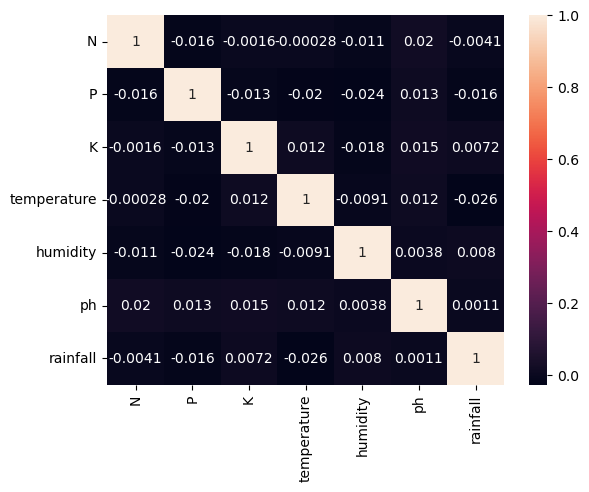

In [17]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
sns.heatmap(features.corr(),annot=True)

In [18]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [19]:
# Encode string labels into numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target_encoded = le.fit_transform(target)

In [ ]:
# Initializing empty lists to append all models name and corresponding name
acc = []
model = []

In [26]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    features, target_encoded, test_size=0.2, random_state=2, stratify=target_encoded
)

# XGBOOST for prediction 


In [27]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

XGBoostModel = XGBClassifier(
    n_estimators=500,      
    learning_rate=0.05,    
    max_depth=6,          
    subsample=0.8,         
    colsample_bytree=0.8,  
    random_state=2,
    use_label_encoder=False,
    eval_metric='mlogloss' 
)

# Fit the model
XGBoostModel.fit(Xtrain, Ytrain)

# Predict on test set
predicted_values = XGBoostModel.predict(Xtest)

# Convert back to original crop names
predicted_values_names = le.inverse_transform(predicted_values)
Ytest_names = le.inverse_transform(Ytest)

# Accuracy
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost Accuracy is: ", x)

# Classification report
print(classification_report(Ytest_names, predicted_values_names))

XGBoost Accuracy is:  0.02666666666666667
              precision    recall  f1-score   support

       bajra       0.00      0.00      0.00        30
      banana       0.00      0.00      0.00        30
      barley       0.04      0.03      0.03        30
     brinjal       0.00      0.00      0.00        30
     cabbage       0.05      0.03      0.04        30
 cauliflower       0.03      0.03      0.03        30
    chickpea       0.00      0.00      0.00        30
      chilli       0.00      0.00      0.00        30
   coriander       0.05      0.07      0.06        30
      cotton       0.08      0.07      0.07        30
      garlic       0.00      0.00      0.00        30
      ginger       0.05      0.03      0.04        30
      grapes       0.03      0.03      0.03        30
   groundnut       0.00      0.00      0.00        30
       jowar       0.06      0.07      0.06        30
       maize       0.06      0.07      0.06        30
       mango       0.04      0.03      

In [28]:
# Cross validation score (XGBoost)
score = cross_val_score(XGBoostModel, features, target_encoded, cv=5)
print("5-Fold CV Score: ", score)
print("Mean CV Accuracy: ", score.mean())

5-Fold CV Score:  [0.03111111 0.02777778 0.02666667 0.02777778 0.02222222]
Mean CV Accuracy:  0.027111111111111107


# Saving trained Guassian Naive Bayes model

In [ ]:
# import pickle
# # Dump the trained Naive Bayes classifier with Pickle
# NB_pkl_filename = 'crop_prediction.pkl'
# # Open the file to save as pkl file
# NB_Model_pkl = open(NB_pkl_filename, 'wb')
# pickle.dump(XGBoostModel, NB_Model_pkl)
# # Close the pickle instances
# NB_Model_pkl.close()

# Making a prediction

In [ ]:
# data = np.array([[98,47,37,23.48381344,81.33265073,7.375482851,224.0581164]])
# prediction = NaiveBayes.predict(data)
# print(prediction)

['wheat']
